## **## Lending club case study**

In [1]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
df = pd.read_csv('/content/drive/MyDrive/loan.csv')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
df.head()



/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


## **Size of File**

In [ ]:
df.shape


(39717, 111)

## **Number of columns**

In [ ]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

# **Returns the number of unique values for each variable.**

In [ ]:
df.nunique(axis=0)


id                            39717
member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
                              ...  
tax_liens                         1
tot_hi_cred_lim                   0
total_bal_ex_mort                 0
total_bc_limit                    0
total_il_high_credit_limit        0
Length: 111, dtype: int64

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


### **Summarizes the count, mean, standard deviation, min, and max for numeric variables.**

In [ ]:
df.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,...,0.000000,0.000000,0.000000,0.000000,39020.000000,39678.000000,0.000000,0.000000,0.000000,0.000000
mean,683131.913060,850463.559408,11219.443815,10947.713196,10397.448868,324.561922,68968.926377,13.315130,0.146512,0.869200,...,nan,nan,nan,nan,0.043260,0.000000,nan,nan,nan,nan
std,210694.132915,265678.307421,7456.670694,7187.238670,7128.450439,208.874874,63793.765790,6.678594,0.491812,1.070219,...,nan,nan,nan,nan,0.204324,0.000000,nan,nan,nan,nan
min,54734.000000,70699.000000,500.000000,500.000000,0.000000,15.690000,4000.000000,0.000000,0.000000,0.000000,...,nan,nan,nan,nan,0.000000,0.000000,nan,nan,nan,nan
25%,516221.000000,666780.000000,5500.000000,5400.000000,5000.000000,167.020000,40404.000000,8.170000,0.000000,0.000000,...,nan,nan,nan,nan,0.000000,0.000000,nan,nan,nan,nan
50%,665665.000000,850812.000000,10000.000000,9600.000000,8975.000000,280.220000,59000.000000,13.400000,0.000000,1.000000,...,nan,nan,nan,nan,0.000000,0.000000,nan,nan,nan,nan
75%,837755.000000,1047339.000000,15000.000000,15000.000000,14400.000000,430.780000,82300.000000,18.600000,0.000000,1.000000,...,nan,nan,nan,nan,0.000000,0.000000,nan,nan,nan,nan
max,1077501.000000,1314167.000000,35000.000000,35000.000000,35000.000000,1305.190000,6000000.000000,29.990000,11.000000,8.000000,...,nan,nan,nan,nan,2.000000,0.000000,nan,nan,nan,nan


In [ ]:
df = df.drop(df.columns[[55]], axis=1)

In [ ]:
df=df.dropna(axis=1)

In [ ]:
df.describe

<bound method NDFrame.describe of             id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0      1077501    1296599       5000         5000           4975.0   
1      1077430    1314167       2500         2500           2500.0   
2      1077175    1313524       2400         2400           2400.0   
3      1076863    1277178      10000        10000          10000.0   
4      1075358    1311748       3000         3000           3000.0   
...        ...        ...        ...          ...              ...   
39712    92187      92174       2500         2500           1075.0   
39713    90665      90607       8500         8500            875.0   
39714    90395      90390       5000         5000           1325.0   
39715    90376      89243       5000         5000            650.0   
39716    87023      86999       7500         7500            800.0   

             term int_rate  installment grade sub_grade  ... total_rec_prncp  \
0       36 months   10.65%       162.87     B

In [ ]:
for i in df.columns:
  print(i,df[i].nunique())

id 39717
member_id 39717
loan_amnt 885
funded_amnt 1041
funded_amnt_inv 8205
term 2
int_rate 371
installment 15383
grade 7
sub_grade 35
home_ownership 5
annual_inc 5318
verification_status 3
issue_d 55
loan_status 3
pymnt_plan 1
url 39717
purpose 14
zip_code 823
addr_state 50
dti 2868
delinq_2yrs 11
earliest_cr_line 526
inq_last_6mths 9
open_acc 40
pub_rec 5
revol_bal 21711
total_acc 82
initial_list_status 1
out_prncp 1137
out_prncp_inv 1138
total_pymnt 37850
total_pymnt_inv 37518
total_rec_prncp 7976
total_rec_int 35148
total_rec_late_fee 1356
recoveries 4040
collection_recovery_fee 2616
last_pymnt_amnt 34930
policy_code 1
application_type 1
acc_now_delinq 1
delinq_amnt 1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 43 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39717 non-null  int64  
 1   member_id                39717 non-null  int64  
 2   loan_amnt                39717 non-null  int64  
 3   funded_amnt              39717 non-null  int64  
 4   funded_amnt_inv          39717 non-null  float64
 5   term                     39717 non-null  object 
 6   int_rate                 39717 non-null  object 
 7   installment              39717 non-null  float64
 8   grade                    39717 non-null  object 
 9   sub_grade                39717 non-null  object 
 10  home_ownership           39717 non-null  object 
 11  annual_inc               39717 non-null  float64
 12  verification_status      39717 non-null  object 
 13  issue_d                  39717 non-null  object 
 14  loan_status           

In [ ]:
df.isnull().mean()

id                         0.0
member_id                  0.0
loan_amnt                  0.0
funded_amnt                0.0
funded_amnt_inv            0.0
term                       0.0
int_rate                   0.0
installment                0.0
grade                      0.0
sub_grade                  0.0
home_ownership             0.0
annual_inc                 0.0
verification_status        0.0
issue_d                    0.0
loan_status                0.0
pymnt_plan                 0.0
url                        0.0
purpose                    0.0
zip_code                   0.0
addr_state                 0.0
dti                        0.0
delinq_2yrs                0.0
earliest_cr_line           0.0
inq_last_6mths             0.0
open_acc                   0.0
pub_rec                    0.0
revol_bal                  0.0
total_acc                  0.0
initial_list_status        0.0
out_prncp                  0.0
out_prncp_inv              0.0
total_pymnt                0.0
total_py

In [ ]:
for i in df.columns:
  print(i,df[i].nunique())

In [ ]:
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,policy_code,acc_now_delinq,delinq_amnt
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.0,39717.0,39717.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,1.0,0.0,0.0
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.0,0.0,0.0
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.0
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,1.0,0.0,0.0
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,9287.150000,8000.000000,1348.910000,0.000000,0.000000,0.000000,546.140000,1.0,0.0,0.0
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,15798.810000,13653.260000,2833.400000,0.000000,0.000000,0.000000,3293.160000,1.0,0.0,0.0
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,58563.680000,35000.020000,23563.680000,180.200000,29623.350000,7002.190000,36115.200000,1.0,0.0,0.0


In [ ]:
df["annual_inc"].describe()

count    3.971700e+04
mean     6.896893e+04
std      6.379377e+04
min      4.000000e+03
25%      4.040400e+04
50%      5.900000e+04
75%      8.230000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

In [ ]:
df["annual_inc"]=np.where(df["annual_inc"]=="?",df["annual_inc"].mode()[0],df["annual_inc"])

In [ ]:
df["home_ownership"].value_counts()

RENT        18899
MORTGAGE    17659
OWN          3058
OTHER          98
NONE            3
Name: home_ownership, dtype: int64

In [ ]:
df["loan_status"].value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

In [ ]:
df["grade"].value_counts()

B    12020
A    10085
C     8098
D     5307
E     2842
F     1049
G      316
Name: grade, dtype: int64

In [ ]:
df = df.drop(df.columns[[50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70]], axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [ ]:
df.tail()

In [ ]:
cont_cols=["loan_amnt","capital-gain","capital-loss","hours-per-week"]

In [ ]:
df = df.drop(df.columns[[18,49,50,51,52,53,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,83,84,85]], axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


# **Exploratory Data Analysis EDA**

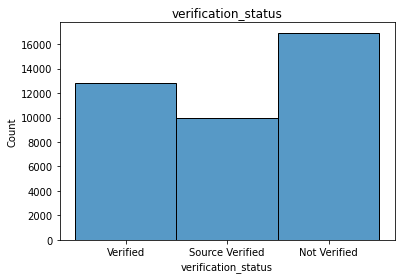

In [ ]:
sns.histplot(df["verification_status"])
plt.title("verification_status")
plt.show()

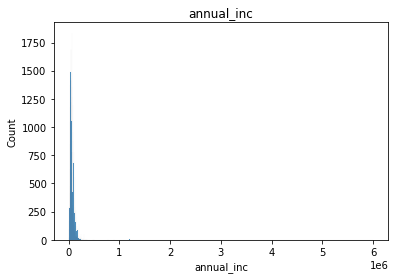

In [ ]:
sns.histplot(df["annual_inc"])
plt.title("annual_inc")
plt.show()

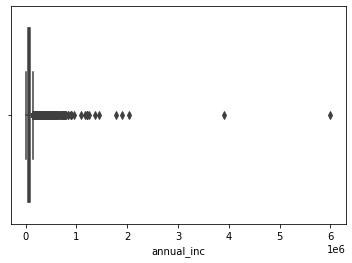

In [ ]:
sns.boxplot(x=df["annual_inc"])


# Removal of outliers from data above 18 Lac Annual income and there are total 4 entries above 18 Lac

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


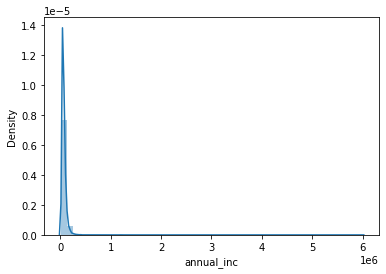

In [ ]:
sns.distplot(df["annual_inc"])

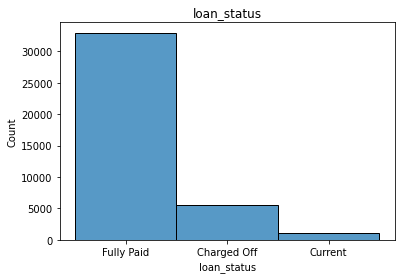

In [ ]:
sns.histplot(df["loan_status"])
plt.title("loan_status")
plt.show()

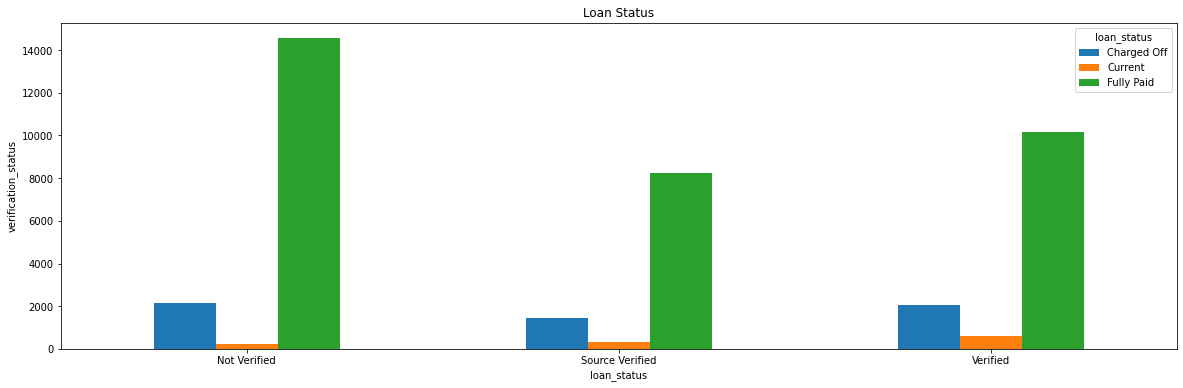

In [30]:
pd.crosstab(df.verification_status,df.loan_status).plot(kind="bar",figsize=(20,6))
plt.title('Loan Status')
plt.xlabel('loan_status')
plt.ylabel('verification_status')
plt.xticks(rotation =0)
plt.savefig('Loan status.png')
plt.show()

# There is no such large effect of verification on repayment of loan.

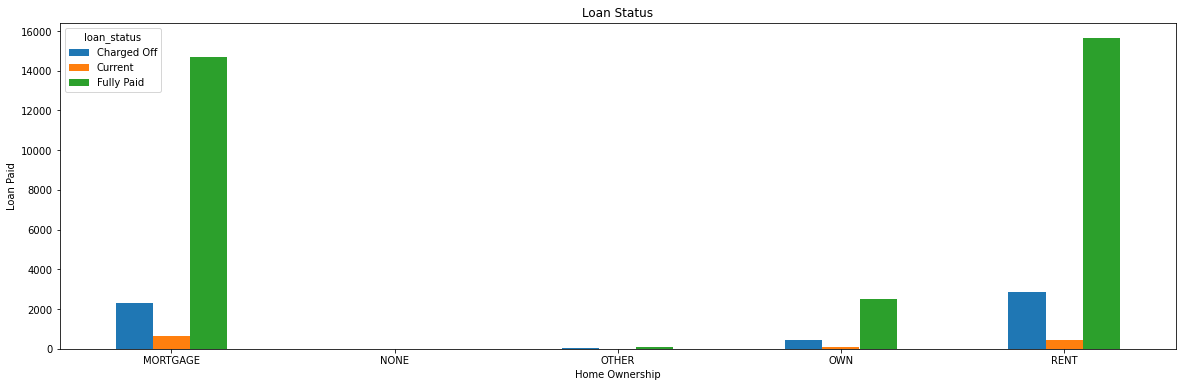

In [26]:
pd.crosstab(df.home_ownership,df.loan_status).plot(kind="bar",figsize=(20,6))
plt.title('Loan Status')
plt.xlabel('Home Ownership')
plt.ylabel('Loan Paid')
plt.xticks(rotation =0)
plt.show()


*   Above graph suggests that borrowers having mortgage and rented house are likely to be defaulter
*   House type should be considered while sanction of loan.






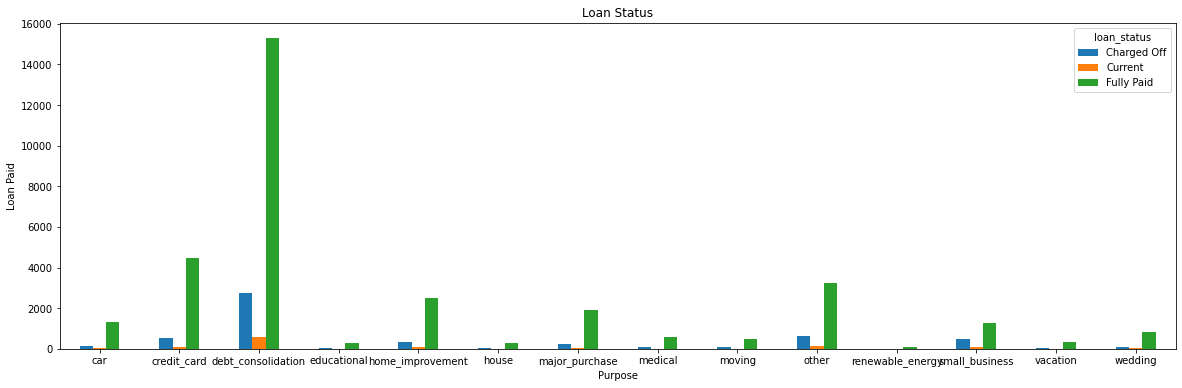

In [27]:
pd.crosstab(df.purpose,df.loan_status).plot(kind="bar",figsize=(20,6))
plt.title('Loan Status')
plt.xlabel('Purpose')
plt.ylabel('Loan Paid')
plt.xticks(rotation =0)
plt.show()



1.   Borrowers who are requesting loan against debt consolidation and small business are likely defaulters.
2.   Borrowers with Debt consolidation should be scrutinized properly. 



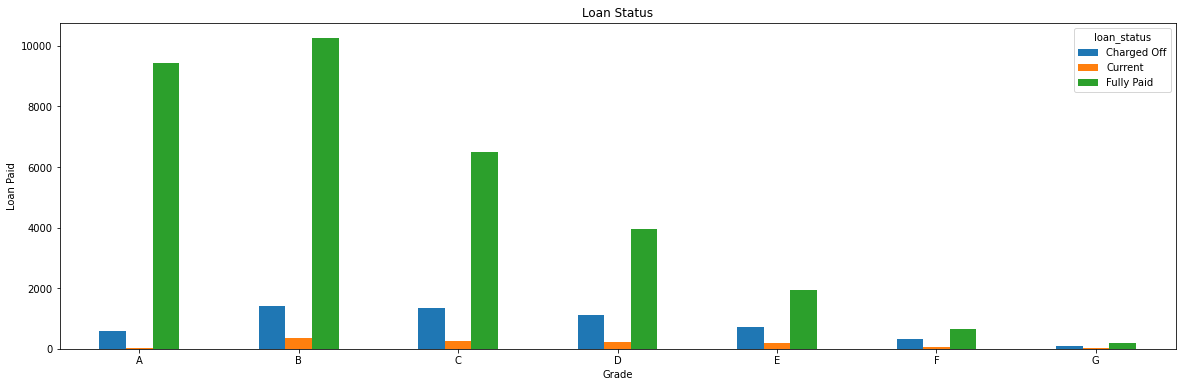

In [28]:
pd.crosstab(df.grade,df.loan_status).plot(kind="bar",figsize=(20,6))
plt.title('Loan Status')
plt.xlabel('Grade')
plt.ylabel('Loan Paid')
plt.xticks(rotation =0)
plt.show()

C and D graded borrowers are likely deafulters.

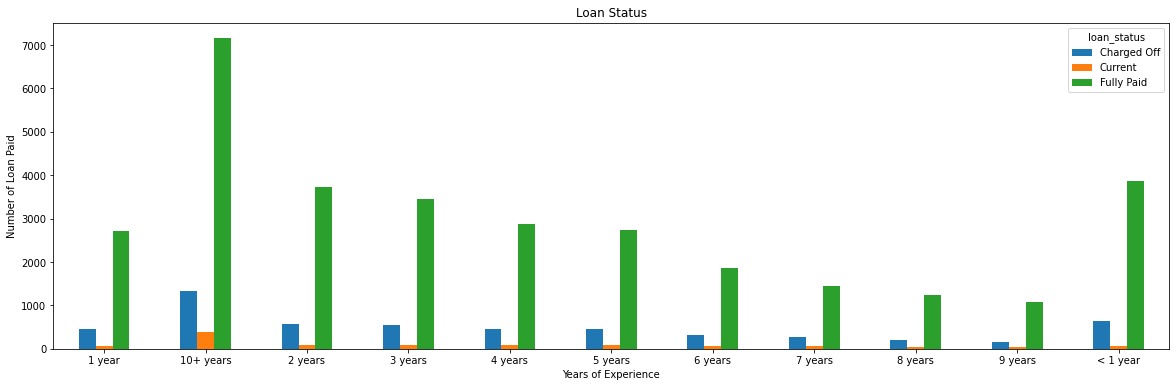

In [29]:
pd.crosstab(df.emp_length,df.loan_status).plot(kind="bar",figsize=(20,6))
plt.title('Loan Status')
plt.xlabel('Years of Experience')
plt.ylabel('Number of Loan Paid')
plt.xticks(rotation =0)
plt.show()

# Borrowers having 1 year & more than 10+ years of experience are likely defaulters

In [ ]:
g=df.groupby('annual_inc')

In [ ]:
df["loan_amnt"]

0         5000
1         2500
2         2400
3        10000
4         3000
         ...  
39712     2500
39713     8500
39714     5000
39715     5000
39716     7500
Name: loan_amnt, Length: 39717, dtype: int64

In [ ]:
g=df.groupby("loan_amnt")

In [ ]:
df.groupby(["loan_amnt"])["annual_inc"].describe().reset_index()

,loan_amnt,count,mean,std,min,25%,50%,75%,max
0,500,5.0,26080.808000,19510.773426,7904.04,18000.0,19500.0,26000.0,59000.0
1,700,1.0,19000.000000,NaN,19000.00,19000.0,19000.0,19000.0,19000.0
2,725,1.0,12000.000000,NaN,12000.00,12000.0,12000.0,12000.0,12000.0
3,750,1.0,19000.000000,NaN,19000.00,19000.0,19000.0,19000.0,19000.0
4,800,1.0,35000.000000,NaN,35000.00,35000.0,35000.0,35000.0,35000.0
...,...,...,...,...,...,...,...,...,...
880,34475,5.0,72396.752000,16795.416368,57881.76,60000.0,71102.0,73000.0,100000.0
881,34525,1.0,112000.000000,NaN,112000.00,112000.0,112000.0,112000.0,112000.0
882,34675,1.0,120000.000000,NaN,120000.00,120000.0,120000.0,120000.0,120000.0
883,34800,2.0,128500.000000,12020.815280,120000.00,124250.0,128500.0,132750.0,137000.0


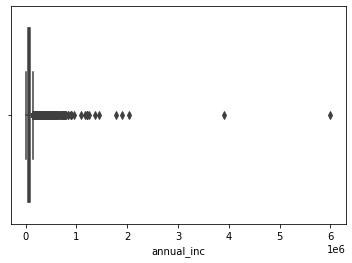

In [ ]:
sns.boxplot(x=df["annual_inc"])

In [ ]:
df1=df[df['annual_inc']>=1800000]

In [ ]:
df1


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,policy_code,application_type,acc_now_delinq,delinq_amnt
23551,611872,784585,1500,1500,1500.00000,36 months,6.17%,45.75,A,A3,...,1500.0,62.35,0.0,0.0,0.0,1197.34,1,INDIVIDUAL,0,0
29639,519954,672152,25000,15500,11430.00082,60 months,10.62%,334.08,B,B3,...,15500.0,4544.62,0.0,0.0,0.0,353.14,1,INDIVIDUAL,0,0
30107,513542,663575,5000,5000,5000.00000,36 months,12.73%,167.84,C,C1,...,5000.0,514.49,0.0,0.0,0.0,3845.25,1,INDIVIDUAL,0,0
39089,269818,267741,8450,8450,3747.00000,36 months,12.29%,281.84,C,C5,...,8450.0,1695.93,0.0,0.0,0.0,293.01,1,INDIVIDUAL,0,0


In [ ]:
df2=df.drop(df[df['annual_inc']>=1800000].index)

In [ ]:
df2

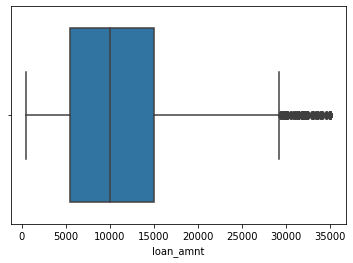

In [ ]:
sns.boxplot(x=df["loan_amnt"])

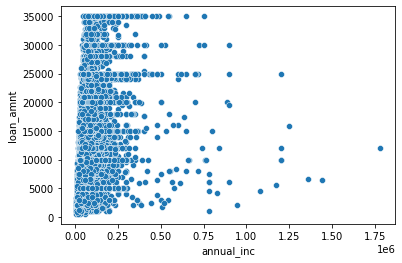

In [ ]:
sns.scatterplot(x=df["annual_inc"],y=df["loan_amnt"])

People with more than 5 Lac are less likely applicants


df3=df2['emp_length'].str.replace(r'\D', '')

In [ ]:
df2['emp_length']=df2['emp_length'].str.rstrip(" year")

In [ ]:
from string import ascii_letters
df2['emp_length'] = df2['emp_length'].map(lambda x: x.lstrip('+-').rstrip(ascii_letters))

In [ ]:
df['colB'] = df['colB'].str.replace(r'\D', '')


In [ ]:
sns.scatterplot(x=df["annual_inc"],y=df[""])

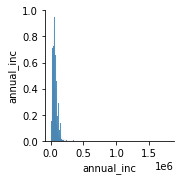

In [ ]:
cont_cols=["annual_inc","verification_status","loan_status"]
sns.pairplot(df2[cont_cols],kind='reg')

In [ ]:
df.groupby(["verification_status"])["loan_status"].describe().reset_index()

,verification_status,count,unique,top,freq
0,Not Verified,16921,3,Fully Paid,14552
1,Source Verified,9987,3,Fully Paid,8243
2,Verified,12809,3,Fully Paid,10155


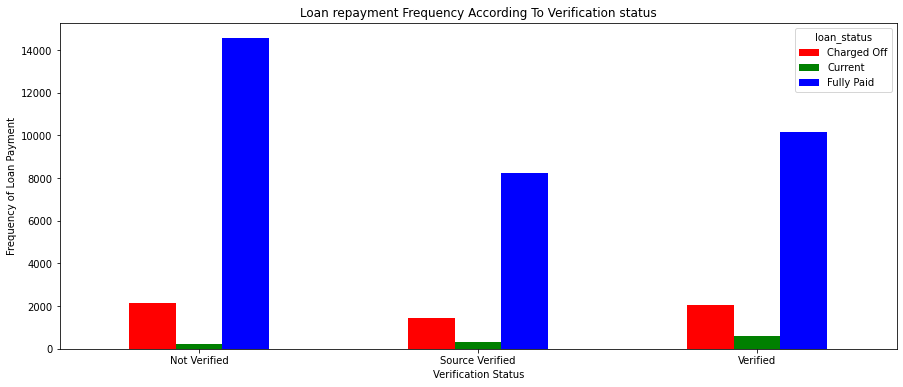

In [14]:
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
pd.crosstab(df.verification_status,df.loan_status).plot(kind="bar",figsize=(15,6),color=['r','g','b' ])
plt.title('Loan repayment Frequency According To Verification status')
plt.xlabel('Verification Status')
plt.xticks(rotation =0)
plt.ylabel('Frequency of Loan Payment')
plt.show()

## **Insights of Lending Club Study**
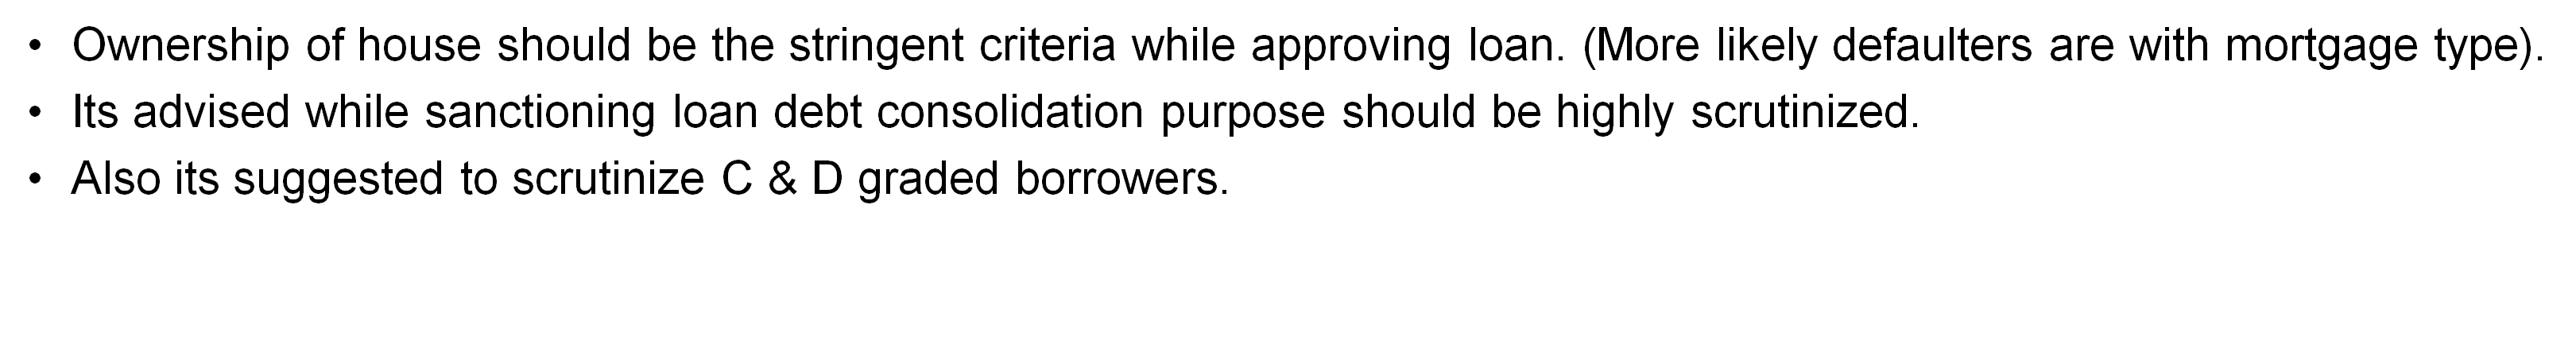